### Moving Average Types
  - Simple Moving Average
  - Cumulative Moving Average
  - Exponential Weighted Moving Average

#### Simple Moving Average

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("temperature.csv",parse_dates=["datetime"])

In [2]:
data.head()

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5


In [3]:
data = data.iloc[:,[0,-7]]

In [4]:
data.head()

,datetime,Boston
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,287.170000
2,2012-10-01 14:00:00,287.186092
3,2012-10-01 15:00:00,287.231672
4,2012-10-01 16:00:00,287.277251


In [5]:
data.isnull().sum()

datetime    0
Boston      3
dtype: int64

In [6]:
data.dropna(axis= 0, inplace = True)

In [7]:
data.isnull().sum()

datetime    0
Boston      0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45250 entries, 1 to 45252
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  45250 non-null  datetime64[ns]
 1   Boston    45250 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.0 MB


#### SMA - Sliding Window of n size
If window  = 3, it'll remove the average of first three rows and then slide down...so the second window's average will be counted.

287+287+287/3 - 1st window
287.180+287.231+287.2777/3 - 2nd Window

##### We use rolling method for that

#### Smoothening

In [9]:
data["SMA"] = data["Boston"].rolling(window = 3).mean()

In [10]:
data.head()

,datetime,Boston,SMA
1,2012-10-01 13:00:00,287.170000,NaN
2,2012-10-01 14:00:00,287.186092,NaN
3,2012-10-01 15:00:00,287.231672,287.195921
4,2012-10-01 16:00:00,287.277251,287.231672
5,2012-10-01 17:00:00,287.322831,287.277251


In [11]:
(287.170000 + 287.186092 + 287.231672)/3  #as we can see the value of 3rd SMA is same as we calculated.

287.19592133333333

In [12]:
data["SMA4"] = data["Boston"].rolling(window = 4).mean()

In [13]:
data.head()

,datetime,Boston,SMA,SMA4
1,2012-10-01 13:00:00,287.170000,NaN,NaN
2,2012-10-01 14:00:00,287.186092,NaN,NaN
3,2012-10-01 15:00:00,287.231672,287.195921,NaN
4,2012-10-01 16:00:00,287.277251,287.231672,287.216254
5,2012-10-01 17:00:00,287.322831,287.277251,287.254461


In [14]:
df_p = data.head(150)

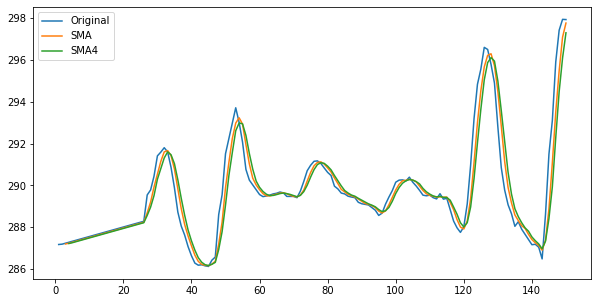

In [15]:
fig = plt.figure(figsize = (10,5))  #figsize(width,height)
plt.plot(df_p["Boston"],label = "Original")
plt.plot(df_p["SMA"],label = "SMA")
plt.plot(df_p["SMA4"],label = "SMA4")
plt.legend()

### Cumulative Moving Average

###### Expanding ---> min_period/window ---> 4

Expanding from min window 0f 4 to 5. 
Expanding for 5 to 6

first 3 will be NAN
BUT 4th will be an average

287+287+287+287/4 - 1st window
287+287+287+287+287/5 - 2nd window
287+287+287+287+287+287/6 - 3rd window

The minimum window keeps epanding.

In [16]:
data["CMA"]= data["Boston"].expanding(min_periods = 4).mean()

In [17]:
data.head(10)

,datetime,Boston,SMA,SMA4,CMA
1,2012-10-01 13:00:00,287.170000,NaN,NaN,NaN
2,2012-10-01 14:00:00,287.186092,NaN,NaN,NaN
3,2012-10-01 15:00:00,287.231672,287.195921,NaN,NaN
4,2012-10-01 16:00:00,287.277251,287.231672,287.216254,287.216254
5,2012-10-01 17:00:00,287.322831,287.277251,287.254461,287.237569
6,2012-10-01 18:00:00,287.368410,287.322831,287.300041,287.259376
7,2012-10-01 19:00:00,287.413990,287.368410,287.345620,287.281464
8,2012-10-01 20:00:00,287.459569,287.413990,287.391200,287.303727
9,2012-10-01 21:00:00,287.505149,287.459569,287.436779,287.326107
10,2012-10-01 22:00:00,287.550728,287.505149,287.482359,287.348569


Calculating manually to verfiy. As we can see the window keeps expanding

In [18]:
(287.170000+287.186092+	287.231672+287.277251)/4

287.21625374999996

In [19]:
(287.170000+287.186092+	287.231672+287.277251+287.322831)/5

287.23756919999994

In [20]:
(287.170000+287.186092+	287.231672+287.277251+287.322831+287.368410)/6

287.259376

### Exponential Moving Average -> Exponential Weighted Moving Average

- adjust -> True 
- adjust -> False

- com,span,halflife -> alpha

- we can even dirctly use alpha if its given, or we can do trial and error to see the smoothening effect!

In [21]:
data["EMA"]= data["Boston"].ewm(com = 0.3).mean()

In [22]:
data["EMA1"]= data["Boston"].ewm(span = 20, adjust = False).mean()

In [23]:
data["EMA2"]= data["Boston"].ewm(alpha = 0.4).mean()

<function matplotlib.pyplot.show(close=None, block=None)>

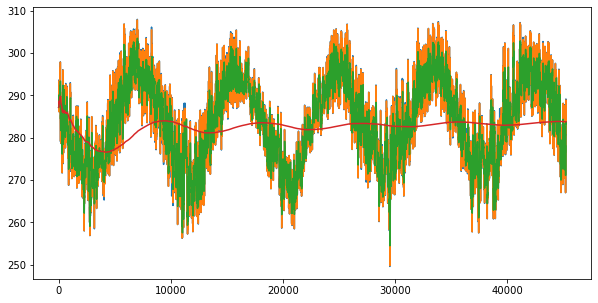

In [24]:
fig = plt.figure(figsize = (10,5))
plt.plot(data["Boston"], label= "Boston Temp")
plt.plot(data["EMA"], label = "EMA")
plt.plot(data["EMA1"], label = "EMA1")
plt.plot(data["CMA"], label = "CMA")
plt.show

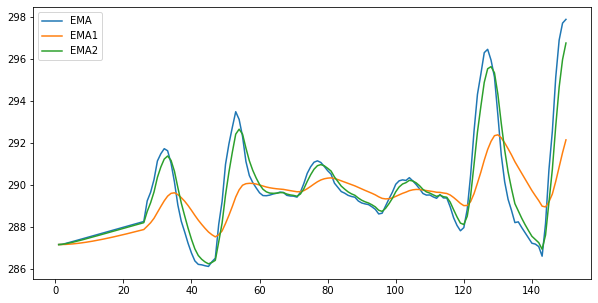

In [25]:
df_p = data.head(150)
fig = plt.figure(figsize = (10,5))
plt.plot(df_p["EMA"], label = "EMA")    #using com
plt.plot(df_p["EMA1"], label = "EMA1")  #using span
plt.plot(df_p["EMA2"], label = "EMA2")  #using alpha
plt.legend()

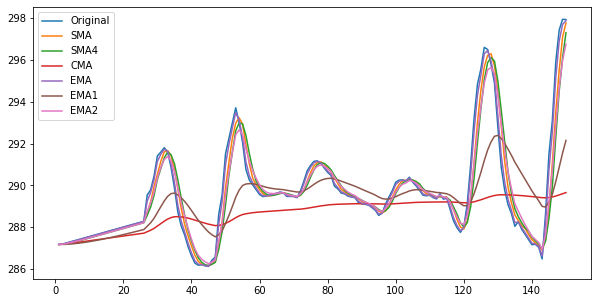

In [26]:
df_p = data.head(150)
fig = plt.figure(figsize = (10,5))
plt.plot(df_p["Boston"],label = "Original")
plt.plot(df_p["SMA"],label = "SMA")
plt.plot(df_p["SMA4"],label = "SMA4")
plt.plot(df_p["CMA"], label = "CMA")
plt.plot(df_p["EMA"], label = "EMA")    #using com
plt.plot(df_p["EMA1"], label = "EMA1")  #using span
plt.plot(df_p["EMA2"], label = "EMA2")  #using alpha
plt.legend()